In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
#########################
##### READ THE DATA #####
#########################
def read_data(base_dir, prefix, suffix_lst, delim=' '):
    # todo - change the column names matrix_size avg_time
    x = []
    for typ in suffix_lst:
        filename = prefix + typ
        file = os.path.join(base_dir, filename)
        df = pd.read_csv(file, delimiter=delim)
        s  = pd.Series(df.avg_time, name=typ)
        s2 = pd.Series(df.matrix_size, name='n')
        x.append(s)
    x.append(s2)
    df = pd.concat(x, axis=1)
    return df


   
#########################
##### PLOT THE DATA #####
#########################

def plot_graph(data, x_label, y_label, title , x_scale=None):
    figure(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
    ax = plt.subplot(1,1,1)

    title_size=15
    label_size = 15
    if x_scale == 'log':
        plt.xscale('log',  basex=2)

    plt.xlabel(x_label, fontsize=label_size)
    plt.ylabel(y_label, fontsize=label_size)
    plt.title(title, fontsize=title_size)
    

    for d in data:
        x_data, y_data, style, label = d
        plt.plot(x_data, y_data, style, label=label)
    ax.legend(loc='upper left')

In [15]:
# t-sim-m1024-b16-      – cache of 1024 items organized in 16-item blocks
# t-sim-m8192-b64-     – cache of 8192 items organized in 64-item blocks
# t-sim-m65536-b256-    – cache of 65536 items organized on 256-item blocks
# t-sim-m65536-b4096-   – cache of 65536 items organized in 4096-item blocks

# t-real-naive
# t-real-smart

base_path = './out-std/'
base_prefix_sim = ['t-sim-m1024-b16-', 't-sim-m8192-b64-', 't-sim-m65536-b256-', 't-sim-m65536-b4096-']
base_prefix_real = 't-real-'
suffixes = ['smart', 'naive']


### Remarks
* Implementation works so that diagonal elements are never swapped ( never accessed )
* cache misses je tedy [1, n*(n-1)]
* ( na diagonale je n prvku tedy n^2 - n = n(n-1)
* avg_case misses per element je tedy [1/n^2, n*(n-1)/n^2] = (0,1) skoro 1 ... totally missed, skoro 0 .. no misses
* kdyz nacteme nejake hodnoty, tak nacteme blok ... tj. aspon 2 hodnoty vedle sebe budou, tj. pres 0.5 se tezko dostat ?

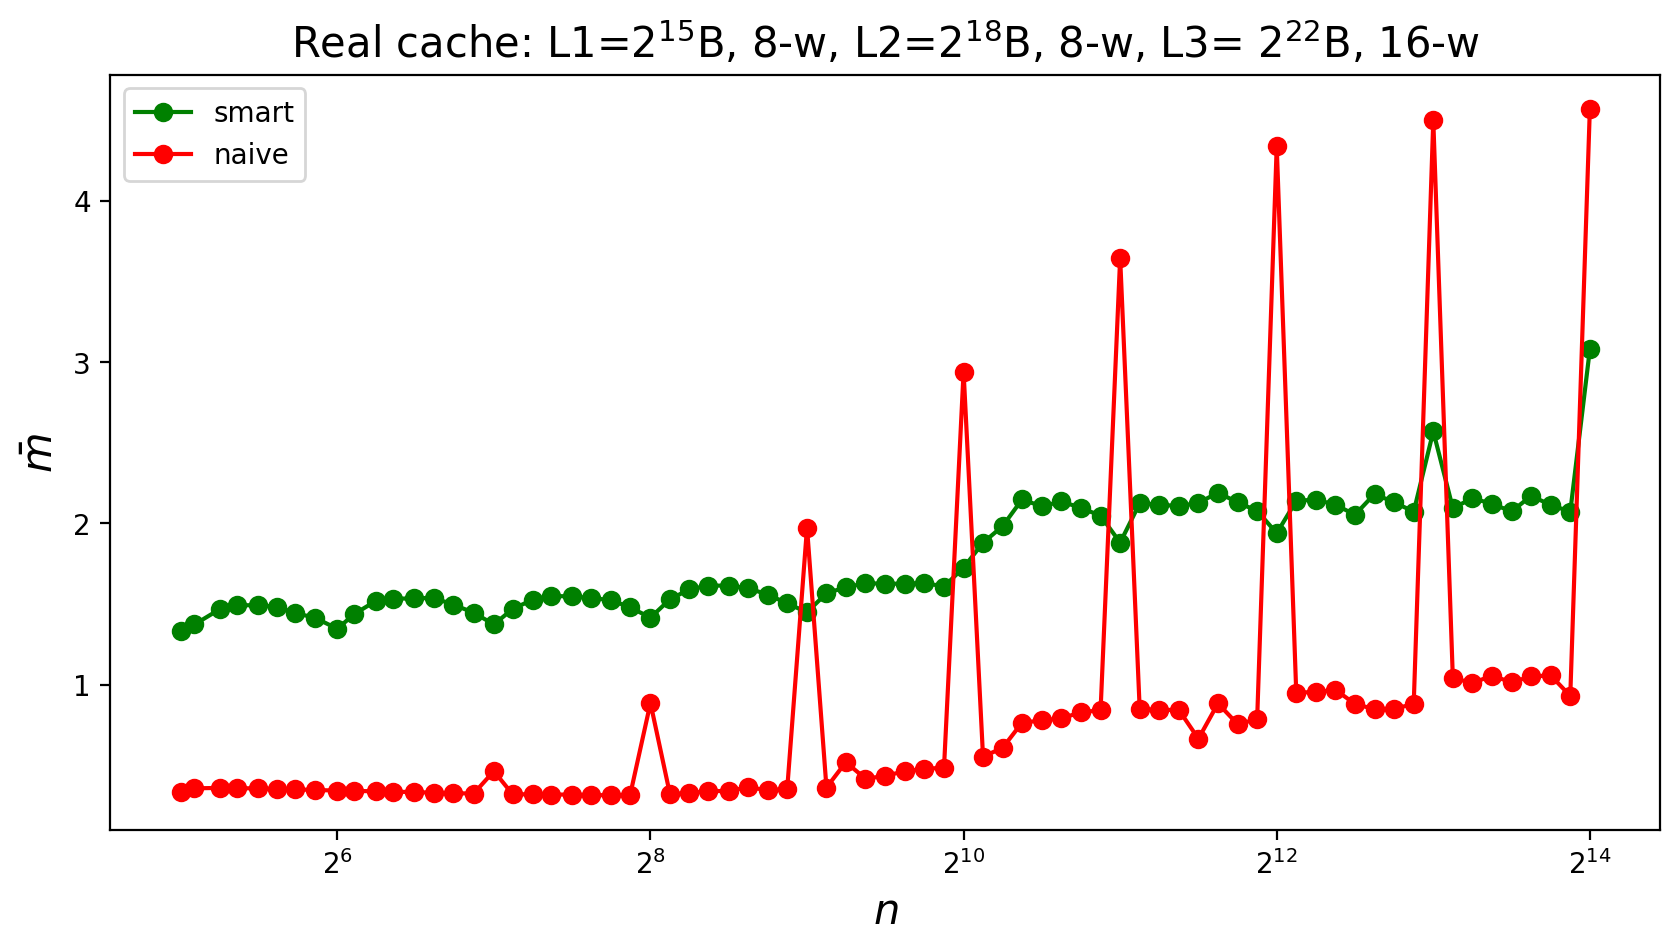

In [38]:

sim_1 = read_data(base_path, base_prefix_real, suffixes, delim=' ')
x = list(sim_1['n'])
data = [(x, sim_1['smart'], 'go-', 'smart'), 
        (x, sim_1['naive'], 'ro-', 'naive')
       ]
split_str = cache_type_prefix.split("-") 
items = split_str[2][1:]

# L1 = 4096KiB = 4 * 1024KiB = 
L1 = r'$2^{15}$B, 8-w'
L2 = r'$2^{18}$B, 8-w'
L3 = r'$2^{22}$B, 16-w'

graph_name = "Real cache: L1="+ L1 + ", L2="+L2+", L3= "+L3

plot_graph(data, r'$n$' , r'$\bar{m}$', graph_name , 'log')
    

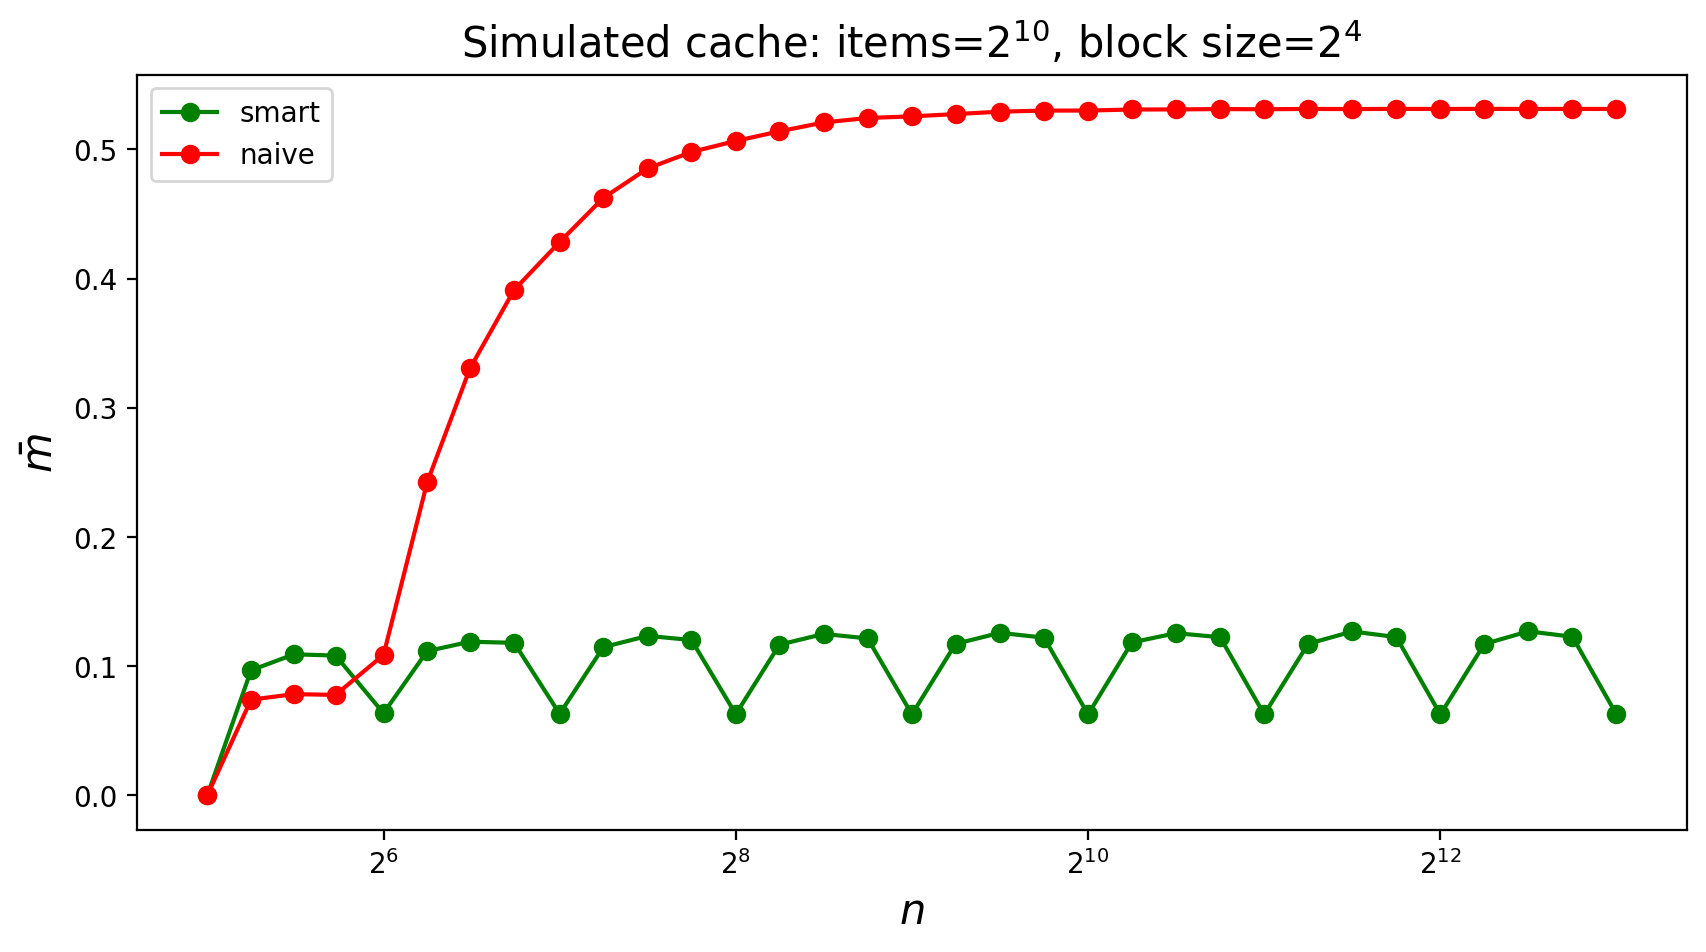

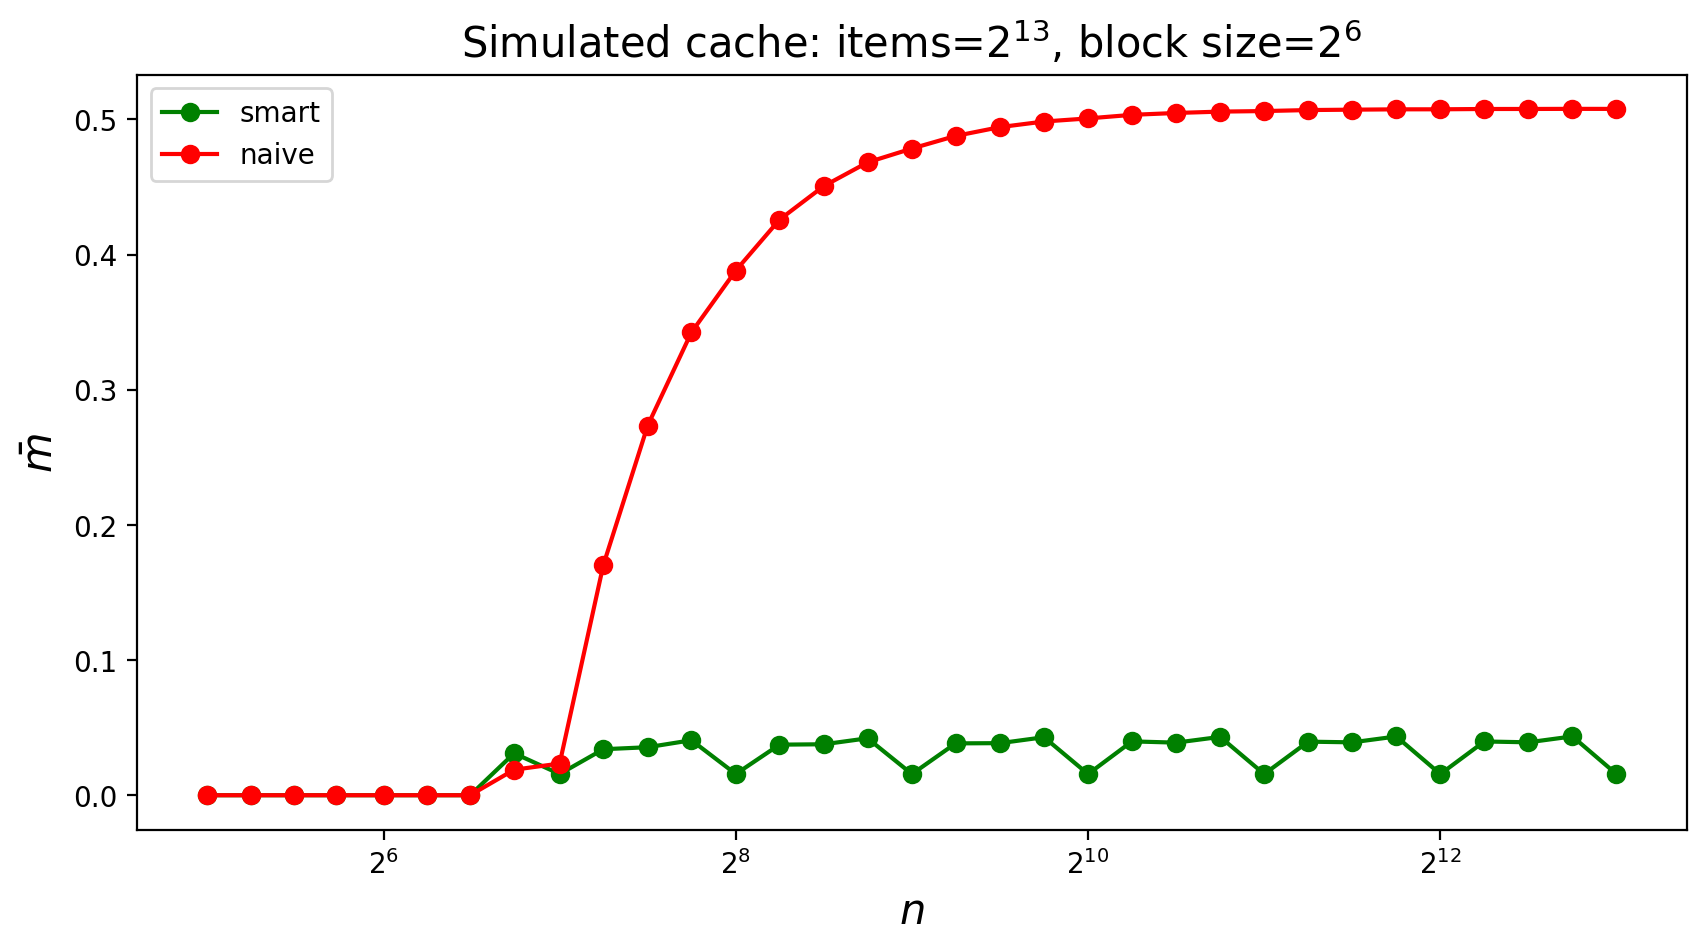

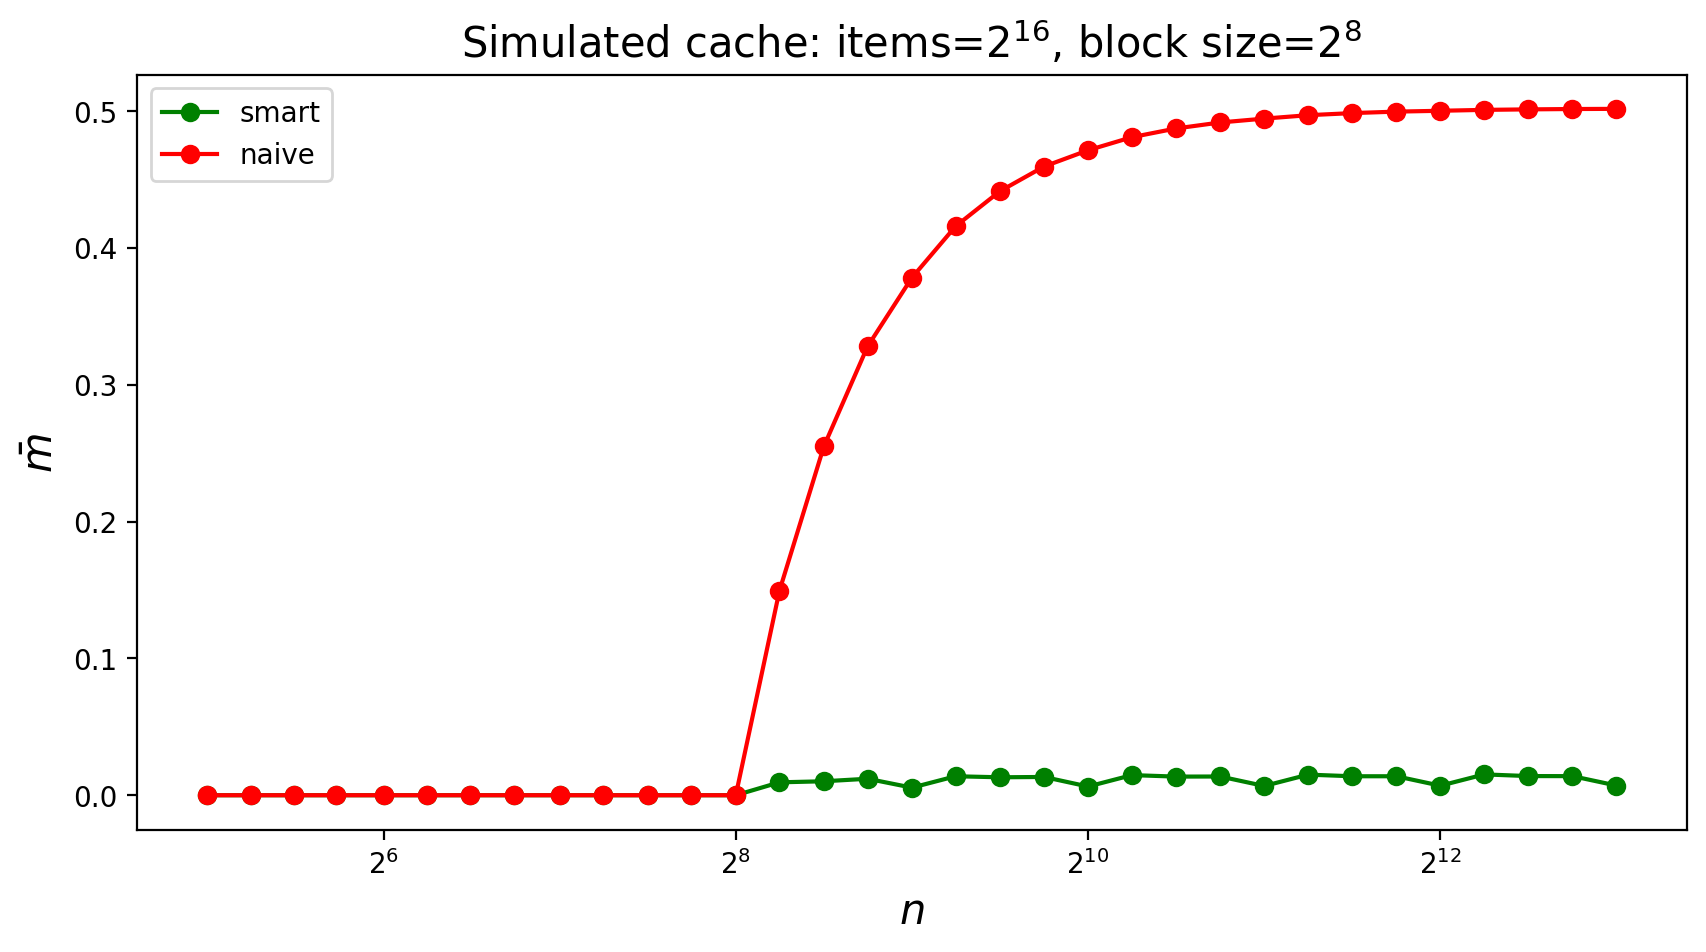

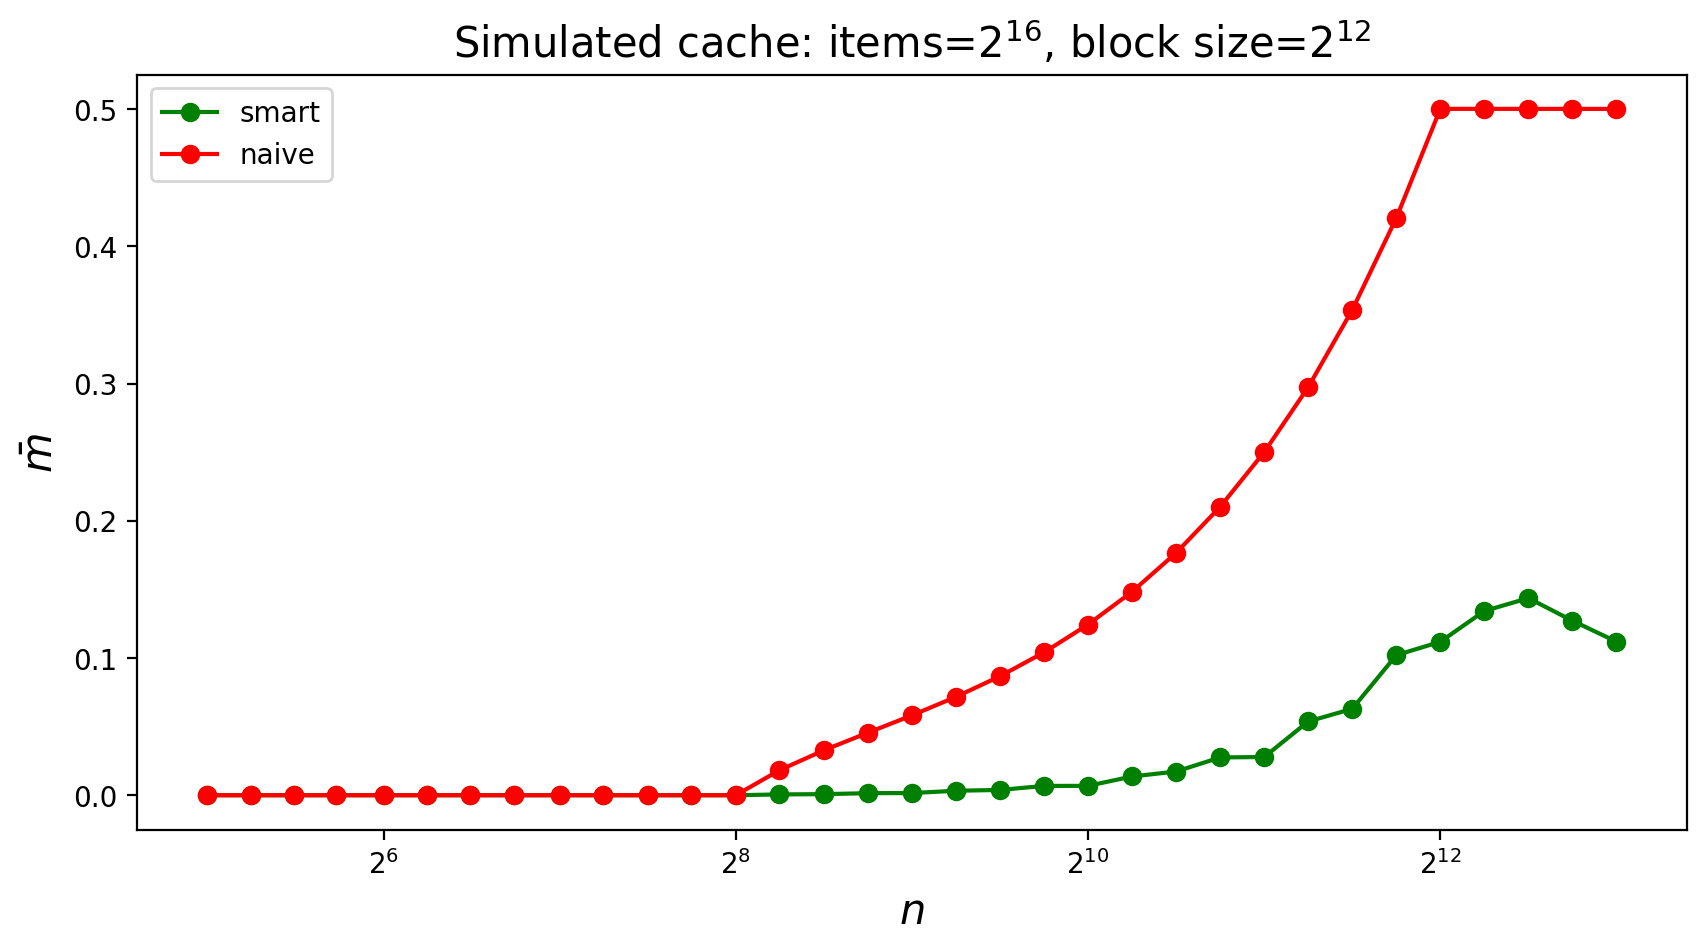

In [33]:
for cache_type_prefix in base_prefix_sim:
    sim_1 = read_data(base_path, cache_type_prefix, suffixes, delim=' ')
    x = list(sim_1['n'])
    data = [(x, sim_1['smart'], 'go-', 'smart'), 
            (x, sim_1['naive'], 'ro-', 'naive')
           ]
    split_str = cache_type_prefix.split("-") 
    items = split_str[2][1:]
    if items == '1024':
        items = r'$2^{10}$'
    if items == '8192':
        items = r'$2^{13}$'  
    if items == '65536':
        items = r'$2^{16}$' 
    blocks = split_str[3][1:]
    if blocks == '16':
        blocks = r'$2^{4}$'
    if blocks == '64':
        blocks = r'$2^{6}$'  
    if blocks == '256':
        blocks = r'$2^{8}$' 
    if blocks == '4096':
        blocks = r'$2^{12}$' 
    graph_name = "Simulated cache: items="+ items + ", block size="+blocks

    plot_graph(data, r'$n$' , r'$\bar{m}$', graph_name , 'log')